# Gradient Descent vs. Proximal Gradient Descent

This notebook contains the implementation and comparison of regular gradient descent with proximal gradient descent over 250 iterations. The loss used for the comparison is L1 regularized logistic loss.

In [1]:
# Import data
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import numpy.linalg as LA
X = loadmat(r"data\\train.mat")
y = np.loadtxt(r"data\\train.targets")
X = np.array(X['X'].todense())

# Number of examples = 12678
n = X.shape[0]

# Number of features = 4932
m = X.shape[1]

# Set w initially
w = np.random.rand(m, 1)

In [2]:
# L1 Regularized Logistic Loss
def LogisticLoss(w, X, y, lam):
    # Computes the cost function for all the training samples
    m = X.shape[0]
    Xw = np.matmul(X,w)
    yT = y.reshape(-1,1)
    yXw = np.multiply(yT,Xw)
    f = np.sum(np.logaddexp(0,-yXw)) + 0.5*lam*np.sum(abs(w))
    num = np.exp(-yXw)
    num[np.isinf(num)] = 0
    den = (1 + np.exp(-yXw))
    den[np.isinf(den)] = 0
    gMul = np.zeros(yXw.shape)
    gMul[den != 0] = (num[den != 0]) / (den[den != 0])
    ymul = -1*yT*gMul
    w_s = np.sign(w.reshape(1,-1))
    g =  np.matmul(ymul.reshape(1,-1),X) + lam*w_s
    g = g.reshape(-1,1)
    return [f, g]

logisticFunObj = lambda w, X, y, lam: LogisticLoss(w, X, y, lam)

In [3]:
# Gradient descent
def gd(funObj, w, maxEvals, X, y, lam, verbosity):
    alpha = 1e-05
    funEvals = 1
    funVals = []
    
    while(1):
        [f, g] = funObj(w, X, y, lam)
        optCond = LA.norm(g, np.inf)
        if (verbosity > 0):
            print(funEvals, alpha, f, optCond)
        w = w - (alpha * g)
        funEvals = funEvals + 1
        if ((optCond < 1e-2) or (funEvals > maxEvals)):
            break
        funVals.append(f)
    
    return funVals

print("Gradient descent with L1 regularized logistic loss:")
gd = gd(logisticFunObj, w, 250, X, y, 1000, 1)

Gradient descent with L1 regularized logistic loss:
1 1e-05 4185182.0948074646 13225.0
2 1e-05 3858036.1403817083 13225.0
3 1e-05 3538678.276824046 13224.0
4 1e-05 3227663.61619653 13224.0
5 1e-05 2923271.1951420307 13224.0
6 1e-05 2625834.0680197687 13224.0
7 1e-05 2337956.8946299665 13224.0
8 1e-05 2059032.2405408109 13223.999999999984
9 1e-05 1790297.3898792816 11974.999982202411
10 1e-05 1529741.407830962 11216.411643186024
11 1e-05 1280261.4424490496 10606.271850983518
12 1e-05 1074865.8555912343 7428.397456562045
13 1e-05 958582.1982759465 4409.402575108616
14 1e-05 892276.8996431538 3650.478706711608
15 1e-05 843868.3972444801 3380.539923629063
16 1e-05 803742.2444940712 3050.7815351594713
17 1e-05 768359.2914354068 2935.48174627598
18 1e-05 736493.3197367117 2786.0225819521634
19 1e-05 707524.1310666028 2604.3896669758824
20 1e-05 681214.4316210928 2389.1777409276547
21 1e-05 657166.8617442806 2179.9221856999284
22 1e-05 634950.6885244324 1979.1648330922949
23 1e-05 614021.9009

179 1e-05 16578.98179324493 3148.9160128676986
180 1e-05 16944.27785266502 1388.1051029103035
181 1e-05 16720.944101848047 3014.312690293788
182 1e-05 17175.72137156267 1394.343457376978
183 1e-05 16392.9924087526 2718.680740517741
184 1e-05 16402.96620187779 1376.531339400337
185 1e-05 16797.515914297615 3246.8728556479127
186 1e-05 17059.711765246822 1391.2255404375173
187 1e-05 16738.367983857876 2892.895556915876
188 1e-05 17130.494007624675 1393.1095955382011
189 1e-05 16439.49492670227 2752.418670572607
190 1e-05 16601.769486356534 1378.030139268587
191 1e-05 16847.073504588 3177.995548417257
192 1e-05 17191.537752904642 1394.176109865981
193 1e-05 16475.781614290434 2669.9952115165524
194 1e-05 16391.770108395438 1371.0031433765114
195 1e-05 16924.444706852628 3280.585349889625
196 1e-05 17271.216904114397 1396.329216694864
197 1e-05 16364.432002525056 2583.8171785767054
198 1e-05 16393.76360302174 1377.909875367007
199 1e-05 17085.1253796042 3407.0643564317143
200 1e-05 17551.5

In [4]:
# Proximal gradient descent
def prox_gd(funObj, w, maxEvals, X, y, lam, verbosity):
    alpha = 1e-05
    funEvals = 1
    funVals = []
    
    while(1):
        [f, g] = funObj(w, X, y, lam)
        optCond = LA.norm(g, np.inf)
        if (verbosity > 0):
            print(funEvals, alpha, f, optCond)
        
        w = w - (alpha * g)
        w = prox(w, lam)
        
        funEvals = funEvals + 1
        if ((optCond < 1e-2) or (funEvals > maxEvals)):
            break
        funVals.append(f)
    
    return funVals

# Calculate prox using h(x)=0 if x!=0 and h(x)=-lam if x=0
def prox(z, lam):
    v = np.sqrt(2 * lam)
    z_n = float(np.sqrt(np.dot(z.T, z)))
    if z_n > v: return z
    else: return np.zeros(z.shape)


print("Proximal gradient descent with L1 regularized logistic loss:")
prox_gd = prox_gd(logisticFunObj, w, 250, X, y, 1000, 1)

Proximal gradient descent with L1 regularized logistic loss:
1 1e-05 4185182.0948074646 13225.0
2 1e-05 8787.719955138986 5886.5
3 1e-05 8787.719955138986 5886.5
4 1e-05 8787.719955138986 5886.5
5 1e-05 8787.719955138986 5886.5
6 1e-05 8787.719955138986 5886.5
7 1e-05 8787.719955138986 5886.5
8 1e-05 8787.719955138986 5886.5
9 1e-05 8787.719955138986 5886.5
10 1e-05 8787.719955138986 5886.5
11 1e-05 8787.719955138986 5886.5
12 1e-05 8787.719955138986 5886.5
13 1e-05 8787.719955138986 5886.5
14 1e-05 8787.719955138986 5886.5
15 1e-05 8787.719955138986 5886.5
16 1e-05 8787.719955138986 5886.5
17 1e-05 8787.719955138986 5886.5
18 1e-05 8787.719955138986 5886.5
19 1e-05 8787.719955138986 5886.5
20 1e-05 8787.719955138986 5886.5
21 1e-05 8787.719955138986 5886.5
22 1e-05 8787.719955138986 5886.5
23 1e-05 8787.719955138986 5886.5
24 1e-05 8787.719955138986 5886.5
25 1e-05 8787.719955138986 5886.5
26 1e-05 8787.719955138986 5886.5
27 1e-05 8787.719955138986 5886.5
28 1e-05 8787.719955138986 5

238 1e-05 8787.719955138986 5886.5
239 1e-05 8787.719955138986 5886.5
240 1e-05 8787.719955138986 5886.5
241 1e-05 8787.719955138986 5886.5
242 1e-05 8787.719955138986 5886.5
243 1e-05 8787.719955138986 5886.5
244 1e-05 8787.719955138986 5886.5
245 1e-05 8787.719955138986 5886.5
246 1e-05 8787.719955138986 5886.5
247 1e-05 8787.719955138986 5886.5
248 1e-05 8787.719955138986 5886.5
249 1e-05 8787.719955138986 5886.5
250 1e-05 8787.719955138986 5886.5


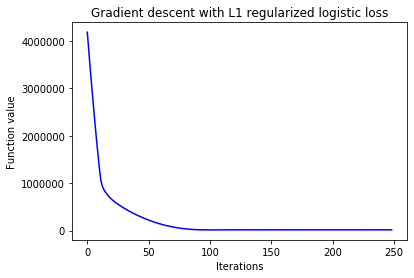

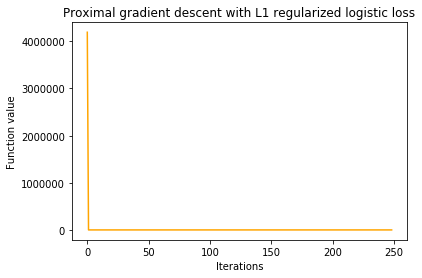

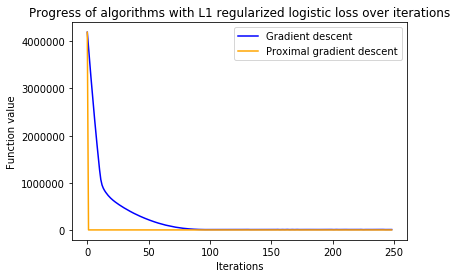

In [5]:
# Compare gradient descent and proximal gradient descent when using L1 logistic loss

plt.title("Gradient descent with L1 regularized logistic loss")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd, label="Gradient descent", color='blue')
plt.show()

plt.title("Proximal gradient descent with L1 regularized logistic loss")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(prox_gd, label="Proximal gradient descent", color='orange')
plt.show()

plt.title("Progress of algorithms with L1 regularized logistic loss over iterations")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd, label="Gradient descent", color='blue')
plt.plot(prox_gd, label="Proximal gradient descent", color='orange')
plt.legend()
plt.show()